## CA 4, LLMs Spring 2025

- **Name:**
- **Student ID:**

---
#### Your submission should be named using the following format: `CA4_Part1_LASTNAME_STUDENTID.ipynb`.

---
TA Email: melika.nobakhtian2000@gmail.com

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says ```Your Answer Here``` with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

# Quantization (37 points)

Quantization is a technique used to reduce the precision of neural network weights and activations, typically from floating-point to a lower-bit representation, such as 8-bit or 4-bit integers. The primary goal of quantization is to reduce the memory footprint and computational requirements of deep learning models, enabling the loading of larger models that would normally not fit into available memory, and speeding up the inference process.

## A simple example (2 points)

Let's see what happens when a we quantize a 32-bit floating-point number.

In [ ]:
# Import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt

Defining two functions which responsible for quantizing and dequantizing the input number:

In [ ]:
def quantize(value, num_bits=4):
    quantized_value = np.round(value * (2**(num_bits - 1) - 1))
    return int(quantized_value)

def dequantize(quantized_value, num_bits=4):
    value = quantized_value / (2**(num_bits - 1) - 1)
    return float(value)

Consider the value `0.415`, the quantized values in 4 and 8 bits are:





In [ ]:
q_4bit = quantize(value=0.415, num_bits=4)
q_8bit = quantize(value=0.415, num_bits=8)

print(f'4-bit: {q_4bit}')
print(f'8-bit: {q_8bit}')

4-bit: 3
8-bit: 53


And if we dequantize it to original full precision values we would have:

In [ ]:
print(f'4-bit: {dequantize(quantized_value=q_4bit, num_bits=4)}')
print(f'8-bit: {dequantize(quantized_value=q_8bit, num_bits=8)}')

4-bit: 0.42857142857142855
8-bit: 0.41732283464566927


8-bit quantization preserves the original precision with very little degradationa and 4-bit quantization does incur more precision loss, but the level of loss can still be tolerated for many applications.

To understand the precision loss from 4-bit and 8-bit quantization, plot the function $y = x^2$ in the range of $[-1, 1]$, and compare the original values to the values obtained after quantization and dequantization for both 4-bit and 8-bit cases.

**# Write your answer here**

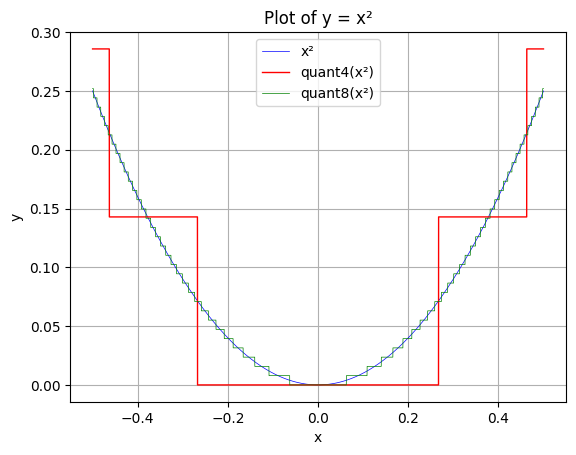

In [ ]:
x = np.linspace(-0.5, 0.5, 4000)
y = x**2

vectorized__quant = np.vectorize(quantize)
vectorized__dequant = np.vectorize(dequantize)
y_quant4 = vectorized__quant(y,4)
y_quant4 = vectorized__dequant(y_quant4,4)
y_quant8 = vectorized__quant(y,8)
y_quant8 = vectorized__dequant(y_quant8,8)

plt.plot(x, y, label='x²', color='blue', linewidth=0.5)
plt.plot(x, y_quant4, label='quant4(x²)', color='red', linewidth=1)
plt.plot(x, y_quant8, label='quant8(x²)', color='green', linewidth=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x²')
plt.grid(True)
plt.legend()

plt.show()

## 4-bit quantization and QLoRA

### Install requirements

*You may need to restart the session after installation.*

In [ ]:
pip install transformers accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

### Comparing Models (4 points)

In this part, you should load a model in two modes: standard and 4-bit mode. After loading model in two modes, print each model. What differences you see between these two versions of model? Why we have these differences?

Layers like linear layers are quantizde, therefore the layers are Linear4bit instead of Linear. these layers are different because, well, we have quantized the model :)) some layers are not quantized for example the normalization layers, i searched and it is apparantley due to sensitive nature of these layers and even small changes made might drastically degrade the output quality, therfore 4bit load leaves those layers as they are and only quantizes some layers.

In [ ]:
from transformers import OPTForCausalLM, AutoTokenizer
import torch

model_id = "facebook/opt-350m"

tokenizer = AutoTokenizer.from_pretrained(model_id)

model_quant = OPTForCausalLM.from_pretrained(
    model_id,
    load_in_4bit=True,
    device_map="cuda:0",
    # torch_dtype=torch.float16
)

model = OPTForCausalLM.from_pretrained(
    model_id,
    load_in_4bit=False,
    device_map="cuda:0",
    # torch_dtype=torch.float16
)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


This is the exact code provided in the huggingface documentation with the same seed, but for some reason it doesn't produce the same output. I have tried various methods and i have no idea why this happens.

In [ ]:
from transformers import pipeline, set_seed

set_seed(32)
generator = pipeline('text-generation', model="facebook/opt-350m", do_sample=True, num_return_sequences=5)
generator("The woman worked as a")

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=21) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'The woman worked as a as a as as as as a as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as� as as as as as as as as as as as as as as as asi as as as as as as as as as as � as Asas as as as as as asas as as-as as as as as as as as as as as as as asyesas as complete as asas as as as as as asasas asas as as as as � as as asasas as as as as as as asas as as asas as as as as as as as as as as asasas asasas as Usas asours as as as as as asasas asasas as asas as asasasasas asas as asasasas as as asas asas'},
 {'generated_text': 'The woman worked as a and a a. as as a as as as a as a as a as a as as as as as as as a as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as as a

In [ ]:
model

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 512, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 1024)
      (project_out): Linear(in_features=1024, out_features=512, bias=False)
      (project_in): Linear(in_features=512, out_features=1024, bias=False)
      (layers): ModuleList(
        (0-23): 24 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=409

In [ ]:
model_quant

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 512, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 1024)
      (project_out): Linear4bit(in_features=1024, out_features=512, bias=False)
      (project_in): Linear4bit(in_features=512, out_features=1024, bias=False)
      (layers): ModuleList(
        (0-23): 24 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear4bit(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear4bit(in_features=1024, out_features=4096, bias=True)
          (

Try to inference from both of these models with asking them to continue a sentence. Is there any difference between their outputs? Why?

**# Write your answer here**

In [ ]:
text = "Welcome! This is"
device = "cuda:0"

model.to(device)
inputs = tokenizer(text, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_new_tokens=20, repetition_penalty=1.5)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Welcome! This is the of.
The The Of             


In [ ]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model=model, tokenizer=tokenizer, repetition_penalty=1.5, do_sample=True, max_new_tokens=20)
generator(text)

Device set to use cuda:0
Both `max_new_tokens` (=20) and `max_length`(=21) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Welcome! This is the For.\nThe Other:  ( ) The Only Use "". You Your Own" :'}]

In [ ]:
model_quant.to(device)
inputs = tokenizer(text, return_tensors="pt").to(device)
outputs = model_quant.generate(**inputs, max_new_tokens=20, repetition_penalty=1.5)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:463: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


Welcome! This is a. A The It In An Of And E
 e You Are? Your Is There Me,


In [ ]:
from transformers import pipeline

generator = pipeline('text-generation', model=model_quant, tokenizer=tokenizer, do_sample=True, repetition_penalty=1.5, max_new_tokens=20)
generator(text)

Device set to use cuda:0
Both `max_new_tokens` (=20) and `max_length`(=21) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Welcome! This is the it.\nThe American has now have been to this a of an are, as with in'}]

### Advanced Quantization with BitsAndBytes (6 points)

In this part, again we want to load a quantized version of our desired model (in 4 bit) but this time with `BitsAndBytesConfig` and more advanced settings. Answer the following questions about different parameters of config or explain about the. Then use them to define the suitable config and load model with it.


*   Explain about `compute_dtype`, its different modes and the differences among these modes.
*   The 4bit integration comes with 2 different quantization types: FP4 and NF4. Explain about them and talk about their differences.
* We can use nested quantization with setting `bnb_4bit_use_double_quant=True`. What is this and What can we do with this?



compute_dtype sets the computation type of the model. this might be different from the input type, for example we can load in 32 bit, but do computations in 16 bit which is faster. it can be any torch.dtype

both are 4bit types, nf4 is a high performance mode and fp4 is the uniform 4 bit. nf4 uses the normal distribution and expands the values that appear more frequently in a neural net, and assigns more bits to show these values, but fp4 simply maps the 4 bits as a uniform distribution and operates like fp32 or fp16.

it applies two quantizations and can save 0.4 bits per parameter (according to this: https://huggingface.co/blog/4bit-transformers-bitsandbytes). this method quantizes a model progressivly and applies the second quantization after the first in a coarse-to-fine manner.

In [ ]:
import torch
from transformers import BitsAndBytesConfig

config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
   bnb_4bit_compute_dtype=torch.bfloat16
)

model_quant_config = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=config)

Again try to make inference from this model by completting a sentence. Is there any difference with previous modes?

In [ ]:
text = "Welcome! This is"
device = "cuda:0"

model_quant_config.to(device)
inputs = tokenizer(text, return_tensors="pt").to(device)
outputs = model_quant_config.generate(**inputs, max_new_tokens=20, repetition_penalty=1.5)
tokenizer.decode(outputs[0], skip_special_tokens=True)

'Welcome! This is a. It’s The A You, Your�  �Your�\nThe: In'

In [ ]:
from transformers import pipeline

generator = pipeline('text-generation', model=model_quant_config, tokenizer=tokenizer, max_new_tokens=20, repetition_penalty=1.5)
generator(text)

Device set to use cuda:0
Both `max_new_tokens` (=20) and `max_length`(=21) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'Welcome! This is aa. A- b la w n s  e an� k g mn r u'}]

## Fine-Tune Gemma using QloRA

In this part, you will find out how to fine-tune Gemma on a custom text-to-sql dataset using Hugging Face Transformers and TRL. You will use and learn about:

* Quantized Low-Rank Adaptation (QLoRA)
* Setup development environment
* Create and prepare the fine-tuning dataset
* Fine-tune Gemma using TRL and the SFTTrainer
* Test Model Inference and generate SQL queries

### Setup environment

*You may need to restart the session after installation.*

In [ ]:
!pip install "torch>=2.4.0" tensorboard

!pip install "transformers>=4.51.3"


!pip install  --upgrade \
  "datasets==3.3.2" \
  "accelerate==1.4.0" \
  "evaluate==0.4.3" \
  "bitsandbytes==0.45.3" \
  "trl==0.15.2" \
  "peft==0.14.0" \
  protobuf \
  sentencepiece

!pip uninstall protobuf python3-protobuf
!pip install --upgrade pip
!pip install --upgrade protobuf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets


Found existing installation: protobuf 6.31.1
Uninstalling protobuf-6.31.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.11/dist-packages/google/protobuf/*
    /usr/local/lib/python3.11/dist-packages/protobuf-6.31.1.dist-info/*
Proceed (Y/n)? ERROR: Operation cancelled by user
^C
^C
^C


In [ ]:
!pip install dotenv

### Hugging Face Login

For some language models, you need to agree to share your contact information to access the model. `gemma-3-1b-pt` is one of them. The steps you should take are as follows:

1.   Create a Gugging Face account if you don't have one.
2.   From Settings > Access Tokens, generate a new token. Your access token should have both read and write permissions.
3.   From [this link](https://huggingface.co/google/gemma-3-1b-pt) agree to access the repository.

Now, run the code below to login to your account.

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()
hf_token = os.getenv("HF_TOKEN")

In [ ]:
from huggingface_hub import login
access_token = hf_token
login(token = access_token)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


### Create and prepare the fine-tuning dataset (6 points)



Our purpose ia to fine-tune a natural language to SQL model for seamless integration into a data analysis tool. Now, we need a dataset to fine-tune.

Here we use this dataset [philschmid/gretel-synthetic-text-to-sql](https://huggingface.co/datasets/philschmid/gretel-synthetic-text-to-sql), a high quality synthetic Text-to-SQL dataset including natural language instructions, schema definitions, reasoning and the corresponding SQL query.

Hugging Face TRL supports automatic templating of conversation dataset formats. This means you only need to convert your dataset into the right json objects, and trl takes care of templating and putting it into the right format.

This dataset contains over 100k samples. But now you should only use 5000 samples and 1000 samples from that will be used for test dataset.

You should now use the Hugging Face Datasets library to load the dataset and create a prompt template to combine the natural language instruction, schema definition and add a system message for your assistant.

In [ ]:
from datasets import load_dataset

dataset = load_dataset('philschmid/gretel-synthetic-text-to-sql', split='train')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

(…)nthetic_text_to_sql_train.snappy.parquet:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

(…)ynthetic_text_to_sql_test.snappy.parquet:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [ ]:
from datasets import load_dataset

dataset_5k = dataset.select(range(5000))
train_test_datasets = dataset_5k.train_test_split(test_size=1000)

train_dataset = train_test_datasets['train']
test_dataset = train_test_datasets['test']

In [ ]:
train_dataset[0]

{'id': 4412,
 'domain': 'social impact investing',
 'domain_description': 'Detailed records on investment strategies, risk assessment, impact measurement, and ESG (Environmental, Social, and Governance) factors in social impact investing.',
 'sql_complexity': 'multiple_joins',
 'sql_complexity_description': 'two or more joins (specify inner, outer, cross)',
 'sql_task_type': 'analytics and reporting',
 'sql_task_type_description': 'generating reports, dashboards, and analytical insights',
 'sql_prompt': 'Which social issues have the highest impact scores in projects located in Southeast Asia?',
 'sql_context': 'CREATE TABLE social_issues (id INT PRIMARY KEY, name VARCHAR(255), impact_score INT);CREATE TABLE projects (id INT PRIMARY KEY, name VARCHAR(255), location VARCHAR(255), budget DECIMAL(10,2));CREATE TABLE project_issues (project_id INT, issue_id INT, PRIMARY KEY (project_id, issue_id));CREATE VIEW high_impact_issues AS SELECT * FROM social_issues WHERE impact_score >= 75;',
 'sq

In [ ]:
# System message for assistant
system_message = """You are a SQL expert that specializes in converting natural language sentences into SQL code."""

# User prompt that combines the 'user query' and the 'schema' (context) from dataset
user_prompt = """ """

# WRITE YOUR CODE HERE
# Complete this function
def create_conversation(sample):
  return {
    "messages": [
      {"role": "system", "content": system_message },
      {"role": "user", "content": f"This is a SQL schema:\n{sample['sql_context']}\n\n{sample['sql_prompt']}"},
      {"role": "assistant", "content": sample["sql"] }
    ]
  }

# Apply the prompt template to the train and test datasets

# Mapping dataset and split it to train and test
# WRITE YOUR CODE HERE

train_dataset_conv = train_dataset.map(create_conversation)
test_dataset_conv = test_dataset.map(create_conversation)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
# Print formatted user prompt
# WRITE YOUR CODE HERE
train_dataset_conv[0]['messages']

[{'content': 'You are a SQL expert that specializes in converting natural language sentences into SQL code.',
  'role': 'system'},
 {'content': "This is a SQL schema:\nCREATE TABLE TraditionalArts (country VARCHAR(50), budget INT); INSERT INTO TraditionalArts (country, budget) VALUES ('United States', 1500000), ('Canada', 900000), ('Mexico', 700000);\n\nWhat is the total budget allocated for traditional arts programs in North American countries?",
  'role': 'user'},
 {'content': "SELECT SUM(budget) FROM TraditionalArts WHERE country IN ('United States', 'Canada', 'Mexico') AND region = 'North America';",
  'role': 'assistant'}]

### Fine-tune Gemma using TRL and the SFTTrainer (12 points)


You are now ready to fine-tune your model. Hugging Face TRL SFTTrainer makes it straightforward to supervise fine-tune open LLMs. The SFTTrainer is a subclass of the Trainer from the transformers library and supports all the same features, including logging, evaluation, and checkpointing, but adds additional quality of life features, including:

* Dataset formatting, including conversational and instruction formats
* Training on completions only, ignoring prompts
* Packing datasets for more efficient training
* Parameter-efficient fine-tuning (PEFT) support including QloRA
* Preparing the model and tokenizer for conversational fine-tuning (such as adding special tokens)

Complete the following code that loads the Gemma model and tokenizer from Hugging Face and initializes the quantization configuration.

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForImageTextToText, BitsAndBytesConfig

# Hugging Face model id
model_id = "google/gemma-3-1b-pt"


# Define model init arguments
# WRITE YOUR CODE HERE
model_kwargs = dict(
    attn_implementation="eager",
    torch_dtype=torch.bfloat16,
    device_map="auto"
)

# WRITE YOUR CODE HERE
model_kwargs["quantization_config"] = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

# WRITE YOUR CODE HERE
# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained(model_id, **model_kwargs)
tokenizer = AutoTokenizer.from_pretrained(model_id)

config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

 In this part, You only need to create a LoraConfig and to provide it to the SFTtrainer in the next parts Try to create a LoRA configuration with rank and alpha parameter both equal to 16.

In [ ]:
from peft import LoraConfig

# WRITE YOUR CODE HERE
peft_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

Before you can start your training, you need to define the hyperparameter you want to use in a SFTConfig instance.

In [ ]:
from trl import SFTConfig

# WRITE YOUR CODE HERE
args = SFTConfig(
    output_dir="./gemma-sft",
    logging_dir="./logs",
    per_device_train_batch_size=4,
    num_train_epochs=1,
    gradient_accumulation_steps=4,
    learning_rate=2e-5,
    max_seq_length=2048,
    bf16=True,
    packing=False,
    save_strategy="epoch",
    logging_steps=10,
    save_total_limit=2,
    report_to="none",
    )

You now have every building block you need to create your SFTTrainer to start the training of your model. Start training model and then save it.

In [ ]:
tokenizer.chat_template = """{% for message in messages %}
{% if message.role == 'system' %}<<SYS>>
{{ message.content }}
<</SYS>>

{% elif message.role == 'user' %}{{ '<|user|>' }} {{ message.content }}{{ '\n' }}
{% elif message.role == 'assistant' %}{{ '<|assistant|>' }} {{ message.content }}{{ '\n' }}
{% endif %}
{% endfor %}"""

In [ ]:
from trl import SFTTrainer

# WRITE YOUR CODE HERE
trainer = SFTTrainer(
    model=model,
    train_dataset=train_dataset_conv,
    eval_dataset=test_dataset_conv,
    tokenizer=tokenizer,
    args=args,
    peft_config=peft_config
)

<ipython-input-14-0ce503e47d84>:4: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(


Converting train dataset to ChatML:   0%|          | 0/4000 [00:00<?, ? examples/s]

Applying chat template to train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Converting eval dataset to ChatML:   0%|          | 0/1000 [00:00<?, ? examples/s]

Applying chat template to eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/1000 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
# WRITE YOUR CODE HERE
trainer.train()

Step,Training Loss
10,1.959400
20,1.917700
30,1.880100
40,1.825900
50,1.831200
60,1.806000
70,1.773500
80,1.761400
90,1.694000
100,1.692600


TrainOutput(global_step=250, training_loss=1.6123903541564941, metrics={'train_runtime': 2286.9073, 'train_samples_per_second': 1.749, 'train_steps_per_second': 0.109, 'total_flos': 4335026017821696.0, 'train_loss': 1.6123903541564941})

In [ ]:
trainer.save_model("./gemma-sft-sql")

Before you can test your model, make sure to free the memory.

I skipped this step since my model could run without memory issues.

In [ ]:
# # free the memory again
# del model
# del trainer
# torch.cuda.empty_cache()

### Test Model Inference and generate SQL queries (7 points)

After the training is done, you should  evaluate and test your model. You should load some samples from the test ataset and evaluate the model on those samples. You do not need to evaluate them based on specific metric. Just try to see different outputs and evaluate them manually.

In [ ]:
# WRITE YOUR CODE HERE
import torch
import random

generated = []
for i in range(3):
  inputs = tokenizer.apply_chat_template(test_dataset_conv[random.randint(0, test_dataset_conv.__len__()-1)]['messages'], return_tensors="pt").to(model.device)

  outputs = model.generate(
      inputs,
      max_length=300,
      pad_token_id=tokenizer.eos_token_id
  )

  generated.append(tokenizer.decode(outputs[0], skip_special_tokens=True))

In [ ]:
for text in generated:
  print("*"*50)
  print("user said: ", generated[i].split("<|user|>")[1].split("<|assistant|>")[0])
  print("assistant said: ", generated[i].split("<|assistant|>")[-1])

**************************************************
user said:   This is a SQL schema:
CREATE TABLE fish_stock (location VARCHAR(50), dissolved_oxygen FLOAT); INSERT INTO fish_stock (location, dissolved_oxygen) VALUES ('Lake Victoria', 6.5), ('Lake Tanganyika', 7.0), ('Pacific Ocean', 8.0);

What is the maximum dissolved oxygen level for each location in the fish_stock table?


assistant said:   SELECT (location, MAX(dissolved_oxygen)) FROM fish_stock GROUP BY location;

<|assistant
**************************************************
user said:   This is a SQL schema:
CREATE TABLE fish_stock (location VARCHAR(50), dissolved_oxygen FLOAT); INSERT INTO fish_stock (location, dissolved_oxygen) VALUES ('Lake Victoria', 6.5), ('Lake Tanganyika', 7.0), ('Pacific Ocean', 8.0);

What is the maximum dissolved oxygen level for each location in the fish_stock table?


assistant said:   SELECT (location, MAX(dissolved_oxygen)) FROM fish_stock GROUP BY location;

<|assistant
**************************

# Self-Explanations (13 points)

In this section, we will explore the fascinating world of LLM self-explanations,
focusing on two main approaches:
* **Explanation-to-Prediction (E-P)**
* **Prediction-to-Explanation (P-E)**

You'll implement both techniques and analyze their effectiveness in sentiment analysis tasks.

Paper: https://arxiv.org/pdf/2310.11207


## Setup and Imports (1 point)

In this part, you should setup OpenAI client. You sould create an account in https://openrouter.ai/ and get a key to use it in the next parts.

In [1]:
!pip install python-dotenv

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

In [5]:
from openai import OpenAI

# WRITE YOUR CODE HERE
open_router_key = api_key

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=open_router_key,
)

## Conceptual Understanding (2 points)



**Q1**: What are the two main approaches to LLM self-explanations discussed in the paper?
Briefly describe each approach.


**Q2**: According to the research, what doubt is cast on LLM explanations?


**# Write your answer here**

 ## Explanation-to-Prediction (E-P) (4 points)

In this part, we will implement E-P for self-explanation for some movie reviews based on paper. Based on paper, you should:
- Complete the E-P prompt template
- Implement the function to call model API
- Parse and analyze the response

**To select model, you can use different models from openrouter that have free API credit.**
https://openrouter.ai/models

In [6]:
# Sample movie reviews for testing
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]

# WRITE YOUR CODE HERE
system_prompt = """
        You are a creative and intelligent movie review analyst, whose purpose is to aid in sentiment analysis of movie reviews. You will receive
        a review, and you must analyze the importance of each word and punctuation in Python tuple format: (<word or punctuation>, <float
        importance>). Each word or punctuation is separated by a space. The importance should be a decimal number to three decimal places
        ranging from -1 to 1, with -1 implying a negative sentiment and 1 implying a positive sentiment. Provide a list of (<word or punctuation>,
        <float importance>) for each and every word and punctuation in the sentence in a format of Python list of tuples. Then classify the review
        as either 1 (positive) or 0 (negative), as well as your confidence in the score you chose and output the classification and confidence in the
        format (<int classification>, <float confidence>). The confidence should be a decimal number between 0 and 1, with 0 being the lowest
        confidence and 1 being the highest confidence.
        It does not matter whether or not the sentence makes sense. Do your best given the sentence.
        The movie review will be encapsulated within <review> tags. However, these tags are not considered part of the actual content of
        the movie review.
        Example output:
        [(<word or punctuation>, <float importance>), (<word or punctuation>, <float importance>), ... ]
        (<int classification>, <float confidence>)
"""

In [28]:
generated = []
for i in range(len(sample_reviews)):
  completion = client.chat.completions.create(
    extra_headers={},
    model="deepseek/deepseek-r1-0528:free",
    messages=[
      {
        "role": "system",
        "content": system_prompt
      },
      {
        "role": "user",
        "content": sample_reviews[i]
      }
    ]
  )
  generated.append(completion.choices[0].message.content)

In [29]:
answers = []
for generated_text in generated:
  answer_pair = {}
  answer_pair["explanation"] = generated_text.split("[")[1].split("]")[0]
  answer_pair["answer"] = generated_text.split("]")[1].split(")")[0]+ ")"
  answers.append(answer_pair)

In [32]:
for i, answer in enumerate(answers):
  print("*"*50)
  print("review: ", sample_reviews[i])
  print("explanation: ", answer["explanation"])
  print("answer: ", answer["answer"])

**************************************************
review:  Offers that rare combination of entertainment and education that makes for great family viewing.
explanation:  ('Offers', 0.1), ('that', 0.0), ('rare', 0.5), ('combination', 0.0), ('of', 0.0), ('entertainment', 0.9), ('and', 0.0), ('education', 0.9), ('that', 0.0), ('makes', 0.0), ('for', 0.0), ('great', 1.0), ('family', 0.3), ('viewing', 0.4), ('.', 0.0)
answer:    
(1, 0.97)
**************************************************
review:  A film that takes you inside the rhythms of its subject with remarkable intimacy.
explanation:  ('A', 0.000), ('film', 0.150), ('that', 0.000), ('takes', 0.000), ('you', 0.000), ('inside', 0.400), ('the', 0.000), ('rhythms', 0.250), ('of', 0.000), ('its', 0.000), ('subject', 0.050), ('with', 0.000), ('remarkable', 0.950), ('intimacy.', 0.800)
answer:    
(1, 0.950)
**************************************************
review:  The movie was absolutely terrible, with poor acting and a confusing plot

## Prediction-to-Explanation (P-E) (4 points)

In this part, we will implement P-E for self-explanation for some movie reviews based on paper. Based on paper, you should:
- Complete the E-P prompt template
- Implement the function to call model API
- Parse and analyze the response

**To select model, you can use different models from openrouter that have free API credit.**
https://openrouter.ai/models

In [33]:
# Sample movie reviews for testing
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]


# WRITE YOUR CODE HERE
system_prompt = """
        You are a creative and intelligent movie review analyst, whose purpose is to aid in sentiment analysis of movie reviews. A review will be
        provided to you, and you must classify the review as either 1 (positive) or 0 (negative), as well as your confidence in the score you chose.
        The confidence should be a decimal number between 0 and 1, with 0 being the lowest confidence and 1 being the highest confidence.
        Output this in the Python tuple format (<int classification>, <float confidence>).
        Then, analyze how important every single word and punctuation token in the review was to your classification. The importance
        should be a decimal number to three decimal places ranging from -1 to 1, with -1 implying a negative sentiment and 1 implying a positive
        sentiment. Provide a list of (<word or punctuation>, <float importance>) for each and every word and punctuation token in the sentence
        in a format of Python list of tuples. Each word or punctuation is separated by a space.
        It does not matter whether or not the sentence makes sense. Do your best given the sentence.
        The movie review will be encapsulated within <review> tags. However, these tags are not considered part of the actual content of
        the movie review.
        Example output:
        (<int classification>, <float confidence>)
        [(<word or punctuation>, <float importance>), (<word or punctuation>, <float importance>), ... ]
"""

In [34]:
generated = []
for i in range(len(sample_reviews)):
  completion = client.chat.completions.create(
    extra_headers={},
    model="deepseek/deepseek-r1-0528:free",
    messages=[
      {
        "role": "system",
        "content": system_prompt
      },
      {
        "role": "user",
        "content": sample_reviews[i]
      }
    ]
  )
  generated.append(completion.choices[0].message.content)

In [53]:
answers = []
for generated_text in generated:
  answer_pair = {}
  answer_pair["answer"] = generated_text.split("(")[1].split(")")[0]
  answer_pair["explanation"] = generated_text[generated_text.find(")")+1:generated_text.find("]")] + "]"
  answers.append(answer_pair)

In [54]:
for i, answer in enumerate(answers):
  print("*"*50)
  print("review: ", sample_reviews[i])
  print("answer: ", answer["answer"])
  print("explanation: ", answer["explanation"])

**************************************************
review:  Offers that rare combination of entertainment and education that makes for great family viewing.
answer:  1, 0.99
explanation:    
[  
    ("Offers", 0.300),  
    ("that", 0.000),  
    ("rare", 0.400),  
    ("combination", 0.100),  
    ("of", 0.000),  
    ("entertainment", 0.700),  
    ("and", 0.000),  
    ("education", 0.700),  
    ("that", 0.000),  
    ("makes", 0.000),  
    ("for", 0.000),  
    ("great", 1.000),  
    ("family", 0.600),  
    ("viewing", 0.300),  
    (".", 0.000)  
]
**************************************************
review:  A film that takes you inside the rhythms of its subject with remarkable intimacy.
answer:  1, 0.95
explanation:    
[  
  ("A", 0.0),  
  ("film", 0.0),  
  ("that", 0.0),  
  ("takes", 0.250),  
  ("you", 0.0),  
  ("inside", 0.450),  
  ("the", 0.0),  
  ("rhythms", 0.150),  
  ("of", 0.0),  
  ("its", 0.0),  
  ("subject", 0.0),  
  ("with", 0.0),  
  ("remarkable", 0.90

# Comparative Analysis (2 points)

Compare Results from both E-P and P-E and talk about the effectiveness of each approach:

**# Write your answer here**